In [28]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.models import Sequential

In [4]:
train_path = "Dataset/Train/" 
test_path = "Dataset/Test/"
valid_path = "Dataset/Validation/"

In [7]:
train_gen = ImageDataGenerator(rescale = 1./255, zoom_range=0.2, shear_range=0.2, fill_mode="nearest")
test_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)

In [8]:
target_size = (64, 64)
epochs = 10
batch_size = 128

In [9]:
train_ds = train_gen.flow_from_directory(train_path, target_size=target_size, batch_size=batch_size)
test_ds = test_gen.flow_from_directory(test_path, target_size=target_size, batch_size=batch_size)
valid_ds = valid_gen.flow_from_directory(valid_path, target_size=target_size, batch_size=batch_size)

Found 160000 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [14]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

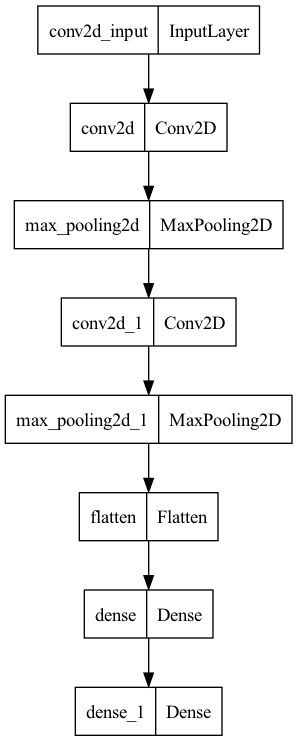

In [29]:
plot_model(model)

In [17]:
history = model.fit_generator(generator=train_ds, validation_data=valid_ds, steps_per_epoch=128, validation_steps=128, epochs=50)

/var/folders/k7/w37qytjn78j3258njhbzvlvr0000gn/T/ipykernel_54794/214167143.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds, validation_data=valid_ds, steps_per_epoch=128, validation_steps=128, epochs=50)


Epoch 1/50


2023-05-26 20:21:22.469404: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


128/128 [==============================] - 28s 216ms/step - loss: 0.6980 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
128/128 [==============================] - 28s 217ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
128/128 [==============================] - 26s 203ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
128/128 [==============================] - 28s 219ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
128/128 [==============================] - 29s 226ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
128/128 [==============================] - 30s 233ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
128/128 [==============================] - 31s 240ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5

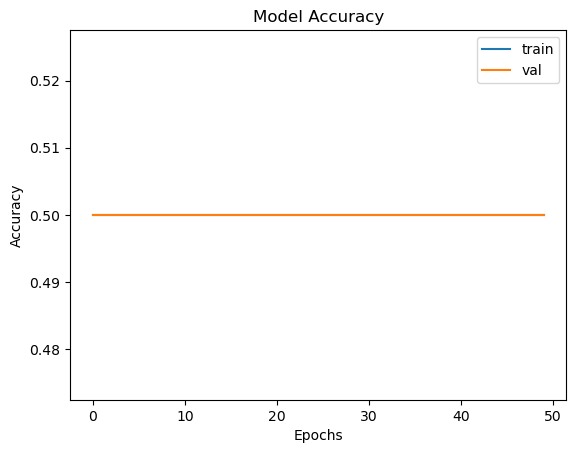

In [18]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

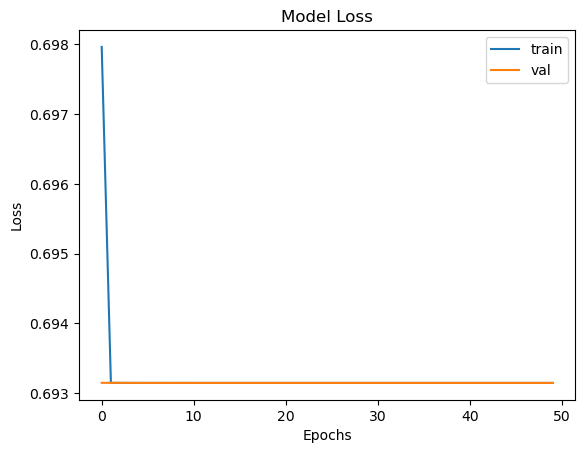

In [19]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [26]:
test_image_path = "Dataset/Test/Male/160002.jpg"
img = load_img(test_image_path, target_size=(64, 64))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])

if classes[0] > 0.5:
    print("Male")
else:
    print("Female")

1/1 [==============================] - 0s 19ms/step
[0.50608855]
Male


In [25]:
model.save("GenderModel.h5")

In [30]:
test_male_path = "Dataset/Test/Male/"
test_female_path = "Dataset/Test/Female/"

In [32]:
test_males = []

for male in os.listdir(test_male_path):
    test_male = os.path.join(test_male_path, male)

    if male.endswith('.jpg'):
        test_males.append(test_male)

In [33]:
len(test_males)

8459

In [34]:
test_females = []

for female in os.listdir(test_female_path):
    test_female = os.path.join(test_female_path, female)

    if female.endswith('.jpg'):
        test_females.append(test_female)

In [35]:
len(test_females)

11542

In [49]:
male_count = 0
for i in range(100):
    rand_idx = np.random.randint(0, 8459)
    test_image_path = test_males[rand_idx]
    img = load_img(test_image_path, target_size=(64, 64))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=1, verbose=0)

    if classes[0] > 0.5:
        male_count += 1
        
print("Male Score: ", male_count, "%")

Male Score:  48 %


In [56]:
female_count = 0
for i in range(100):
    rand_idx = np.random.randint(0, 11542)
    test_image_path = test_females[rand_idx]
    img = load_img(test_image_path, target_size=(64, 64))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=1, verbose=0)

    if classes[0] < 0.5:
        female_count += 1
        
print("Female Score: ", female_count, "%")

Female Score:  58 %
